# Read csv files into pandas DataFrames

In [1]:
import pandas as pd
import numpy as np
import csv

In [2]:
# Display 25 rows maximum from DataFrame's (avoid disasters! ;-)
def display(df,max_rows=25,dumptypes=True,**kwds):
    from IPython.display import display, HTML
    display(HTML(df.to_html(max_rows=max_rows,**kwds)))
    if dumptypes: print [ (col,df[col].dtypes) for col in df ]

## Learn how to read only subsets of the csv files

We will use the itertools module of Python to select only specific lines from the csv files. 

First we will create a smaller csv file with very basic Python, to later test itertools while displaying all results.

In [3]:
with open('CSV/aug2014.csv', 'rb') as fr:
    with open('CSV/aug2014_20.csv', 'wb') as fw:
        reader = csv.reader(fr)
        writer = csv.writer(fw)
        col = next(reader) # First line
        writer.writerows((col,)) # Iterate over a tuple containing only one list
        nrows = 0
        for row in reader: 
            writer.writerows((row,))  # Iterate over a tuple containing only one list
            nrows += 1
            if nrows >= 20: break            

In [4]:
# Fix DataFrame types reading them from another file (I got this wrong at first)
def fixDFtypes(df, filepath, quiet=True):    
    with open(filepath, 'rb') as f:
        reader = csv.reader(f)
        columns = next(reader)
        types = next(reader)
    for c,t in zip(columns,types):
        old = df[c].dtypes
        if df[c].dtypes != t: 
            if t == np.dtype(np.float64):
                t = np.dtype(np.int64) # for better reporting
                try: df[c] = df[c].astype(t)
                except: 
                    try: 
                        # See http://stackoverflow.com/questions/17097236
                        df[c] = df[c].where(df[c] != '', None) # Replace empty strings by None else conversion fails
                        df[c] = df[c].astype(np.dtype(np.float64))
                    except: pass
            elif t == np.dtype('datetime64[ns]'): 
                df[c] = df[c].astype(t) + np.timedelta64(2,'h')
            elif t == np.dtype('timedelta64[ns]'): 
                try: df[c] = pd.to_timedelta('0'+df[c]) # dirty hack, will not work if >= 10 hours!
                except: pass
            else: 
                df[c] = df[c].astype(np.dtype(t)) # no path to this statement actually...
        if not quiet: print c, 'was', old, '-> tried', t, '==> is', df[c].dtypes

In [5]:
with open('CSV/aug2014_20.csv', 'rb') as f:
    reader = csv.reader(f)
    col = next(reader)
    df = pd.DataFrame.from_records(reader, columns=col)
    fixDFtypes(df,'CSV/xxx14_types.csv',quiet=False)
display(df)

SRC_SITE was object -> tried object ==> is object
DST_SITE was object -> tried object ==> is object
SRC_HOST was object -> tried object ==> is object
DST_HOST was object -> tried object ==> is object
SRC_SPACE_TOKEN was object -> tried object ==> is object
DST_SPACE_TOKEN was object -> tried object ==> is object
CHANNEL was object -> tried object ==> is object
VO was object -> tried object ==> is object
SERVER was object -> tried object ==> is object
ACTIVITY was object -> tried object ==> is object
PERIOD_END_TIME was object -> tried datetime64[ns] ==> is datetime64[ns]
NUMBER_OF_SUCCESSES was object -> tried int64 ==> is int64
NUMBER_OF_FAILURES was object -> tried int64 ==> is int64
TOTAL_BYTES was object -> tried int64 ==> is int64
NUMBER_OF_STREAMS was object -> tried int64 ==> is float64
TRANSFER_TIME was object -> tried int64 ==> is int64
SRM_PREPARATION_TIME was object -> tried int64 ==> is int64
SRM_FINALIZATION_TIME was object -> tried int64 ==> is int64
UPDATE_TIME was objec

[('SRC_SITE', dtype('O')), ('DST_SITE', dtype('O')), ('SRC_HOST', dtype('O')), ('DST_HOST', dtype('O')), ('SRC_SPACE_TOKEN', dtype('O')), ('DST_SPACE_TOKEN', dtype('O')), ('CHANNEL', dtype('O')), ('VO', dtype('O')), ('SERVER', dtype('O')), ('ACTIVITY', dtype('O')), ('PERIOD_END_TIME', dtype('<M8[ns]')), ('NUMBER_OF_SUCCESSES', dtype('int64')), ('NUMBER_OF_FAILURES', dtype('int64')), ('TOTAL_BYTES', dtype('int64')), ('NUMBER_OF_STREAMS', dtype('float64')), ('TRANSFER_TIME', dtype('int64')), ('SRM_PREPARATION_TIME', dtype('int64')), ('SRM_FINALIZATION_TIME', dtype('int64')), ('UPDATE_TIME', dtype('<M8[ns]'))]


In [6]:
with open('CSV/aug2014_20.csv', 'rb') as f:
    reader = csv.reader(f)
    col = next(reader)
    df = pd.DataFrame.from_records(reader, columns=col)
    fixDFtypes(df,'CSV/xxx14_types.csv')
display(df,max_rows=5) # Test displaying only 5 rows

[('SRC_SITE', dtype('O')), ('DST_SITE', dtype('O')), ('SRC_HOST', dtype('O')), ('DST_HOST', dtype('O')), ('SRC_SPACE_TOKEN', dtype('O')), ('DST_SPACE_TOKEN', dtype('O')), ('CHANNEL', dtype('O')), ('VO', dtype('O')), ('SERVER', dtype('O')), ('ACTIVITY', dtype('O')), ('PERIOD_END_TIME', dtype('<M8[ns]')), ('NUMBER_OF_SUCCESSES', dtype('int64')), ('NUMBER_OF_FAILURES', dtype('int64')), ('TOTAL_BYTES', dtype('int64')), ('NUMBER_OF_STREAMS', dtype('float64')), ('TRANSFER_TIME', dtype('int64')), ('SRM_PREPARATION_TIME', dtype('int64')), ('SRM_FINALIZATION_TIME', dtype('int64')), ('UPDATE_TIME', dtype('<M8[ns]'))]


In [7]:
import itertools
print dir(itertools)

['__doc__', '__file__', '__name__', '__package__', 'chain', 'combinations', 'combinations_with_replacement', 'compress', 'count', 'cycle', 'dropwhile', 'groupby', 'ifilter', 'ifilterfalse', 'imap', 'islice', 'izip', 'izip_longest', 'permutations', 'product', 'repeat', 'starmap', 'takewhile', 'tee']


In [8]:
help(itertools.islice)

Help on class islice in module itertools:

class islice(__builtin__.object)
 |  islice(iterable, [start,] stop [, step]) --> islice object
 |  
 |  Return an iterator whose next() method returns selected values from an
 |  iterable.  If start is specified, will skip all preceding elements;
 |  otherwise, start defaults to zero.  Step defaults to one.  If
 |  specified as another value, step determines how many values are 
 |  skipped between successive calls.  Works like a slice() on a list
 |  but returns an iterator.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(...)
 |      x.__getattribute__('name') <==> x.name
 |  
 |  __iter__(...)
 |      x.__iter__() <==> iter(x)
 |  
 |  next(...)
 |      x.next() -> the next value, or raise StopIteration
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __new__ = <built-in method __new__ of type object>
 |      T.__new__(S, ...) -> a new object with 

In [9]:
with open('CSV/aug2014_20.csv', 'rb') as f:
    reader = csv.reader(f)
    col = next(reader) # First line
    reader = itertools.islice( reader, 10, 15 ) # Only rows 10-14 included
    df = pd.DataFrame.from_records(reader, columns=col)
    fixDFtypes(df,'CSV/xxx14_types.csv')
display(df)

[('SRC_SITE', dtype('O')), ('DST_SITE', dtype('O')), ('SRC_HOST', dtype('O')), ('DST_HOST', dtype('O')), ('SRC_SPACE_TOKEN', dtype('O')), ('DST_SPACE_TOKEN', dtype('O')), ('CHANNEL', dtype('O')), ('VO', dtype('O')), ('SERVER', dtype('O')), ('ACTIVITY', dtype('O')), ('PERIOD_END_TIME', dtype('<M8[ns]')), ('NUMBER_OF_SUCCESSES', dtype('int64')), ('NUMBER_OF_FAILURES', dtype('int64')), ('TOTAL_BYTES', dtype('int64')), ('NUMBER_OF_STREAMS', dtype('float64')), ('TRANSFER_TIME', dtype('int64')), ('SRM_PREPARATION_TIME', dtype('int64')), ('SRM_FINALIZATION_TIME', dtype('int64')), ('UPDATE_TIME', dtype('<M8[ns]'))]


In [10]:
help(itertools.ifilter)

Help on class ifilter in module itertools:

class ifilter(__builtin__.object)
 |  ifilter(function or None, sequence) --> ifilter object
 |  
 |  Return those items of sequence for which function(item) is true.
 |  If function is None, return the items that are true.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(...)
 |      x.__getattribute__('name') <==> x.name
 |  
 |  __iter__(...)
 |      x.__iter__() <==> iter(x)
 |  
 |  next(...)
 |      x.next() -> the next value, or raise StopIteration
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __new__ = <built-in method __new__ of type object>
 |      T.__new__(S, ...) -> a new object with type S, a subtype of T



In [11]:
with open('CSV/aug2014_20.csv', 'rb') as f:
    reader = csv.reader(f)
    col = next(reader) # First line
    reader = itertools.ifilter( lambda row: row[col.index('DST_SPACE_TOKEN')] == 'ATLASDATADISK', reader )
    df = pd.DataFrame.from_records(reader, columns=col)
    fixDFtypes(df,'CSV/xxx14_types.csv')
display(df)

[('SRC_SITE', dtype('O')), ('DST_SITE', dtype('O')), ('SRC_HOST', dtype('O')), ('DST_HOST', dtype('O')), ('SRC_SPACE_TOKEN', dtype('O')), ('DST_SPACE_TOKEN', dtype('O')), ('CHANNEL', dtype('O')), ('VO', dtype('O')), ('SERVER', dtype('O')), ('ACTIVITY', dtype('O')), ('PERIOD_END_TIME', dtype('<M8[ns]')), ('NUMBER_OF_SUCCESSES', dtype('int64')), ('NUMBER_OF_FAILURES', dtype('int64')), ('TOTAL_BYTES', dtype('int64')), ('NUMBER_OF_STREAMS', dtype('float64')), ('TRANSFER_TIME', dtype('int64')), ('SRM_PREPARATION_TIME', dtype('int64')), ('SRM_FINALIZATION_TIME', dtype('int64')), ('UPDATE_TIME', dtype('<M8[ns]'))]


## Read all csv files with summary data into pandas DataFrames 

In [12]:
import time
dfs = {}
for period in 'aug2014', 'nov2014':
    for endpnt in 'fts3.cern.ch', 'lcgfts3.gridpp.rl.ac.uk':
        fname = 'CSV/'+period+'.csv'
        with open(fname, 'rb') as f:
            print "=== Read "+endpnt+" transfer summaries from "+fname+" into a DataFrame"
            start = time.time()
            reader = csv.reader(f)
            col = next(reader) # First line
            reader = itertools.ifilter( lambda row: row[col.index('SERVER')] == endpnt, reader )
            dfs[(period,endpnt)] = pd.DataFrame.from_records(reader, columns=col)
            elapsed = (time.time() - start)
            print "Done in", elapsed, " seconds"
            print "Set column types"
            start = time.time()
            fixDFtypes(dfs[(period,endpnt)],'CSV/xxx14_types.csv',quiet=False)
            elapsed = (time.time() - start)
            print "Done in", elapsed, " seconds"

=== Read fts3.cern.ch transfer summaries from CSV/aug2014.csv into a DataFrame
Done in 39.3676419258  seconds
Set column types
SRC_SITE was object -> tried object ==> is object
DST_SITE was object -> tried object ==> is object
SRC_HOST was object -> tried object ==> is object
DST_HOST was object -> tried object ==> is object
SRC_SPACE_TOKEN was object -> tried object ==> is object
DST_SPACE_TOKEN was object -> tried object ==> is object
CHANNEL was object -> tried object ==> is object
VO was object -> tried object ==> is object
SERVER was object -> tried object ==> is object
ACTIVITY was object -> tried object ==> is object
PERIOD_END_TIME was object -> tried datetime64[ns] ==> is datetime64[ns]
NUMBER_OF_SUCCESSES was object -> tried int64 ==> is int64
NUMBER_OF_FAILURES was object -> tried int64 ==> is int64
TOTAL_BYTES was object -> tried int64 ==> is int64
NUMBER_OF_STREAMS was object -> tried int64 ==> is float64
TRANSFER_TIME was object -> tried int64 ==> is int64
SRM_PREPARATION

In [13]:
print dfs

{('aug2014', 'lcgfts3.gridpp.rl.ac.uk'):         SRC_SITE DST_SITE                      SRC_HOST  \
0            n/a      n/a                 srm.triumf.ca   
1            n/a      n/a                 srm.triumf.ca   
2            n/a      n/a                 srm.triumf.ca   
3            n/a      n/a                 srm.triumf.ca   
4            n/a      n/a                 srm.triumf.ca   
5            n/a      n/a                 srm.triumf.ca   
6            n/a      n/a                 srmcms.pic.es   
7            n/a      n/a               cmseos.fnal.gov   
8            n/a      n/a               srmatlas.pic.es   
9            n/a      n/a              dcache07.unl.edu   
10           n/a      n/a              srm.grid.sara.nl   
11           n/a      n/a              srm.grid.sara.nl   
12           n/a      n/a                   se3.itep.ru   
13           n/a      n/a                 ff-se.unl.edu   
14           n/a      n/a                 srm.triumf.ca   
15           n/

In [14]:
# Change the labels
for key in dfs.keys():
    if key[1] == 'fts3.cern.ch': 
        dfs[key[0],'CERN'] = dfs[key] 
        del dfs[key]
    if key[1] == 'lcgfts3.gridpp.rl.ac.uk': 
        dfs[key[0],'RAL '] = dfs[key] 
        del dfs[key]
for key in dfs: print key

('nov2014', 'CERN')
('nov2014', 'RAL ')
('aug2014', 'CERN')
('aug2014', 'RAL ')


In [15]:
for key in dfs: 
    print key,":"
    display(dfs[key],max_rows=5)

('nov2014', 'CERN') :


[('SRC_SITE', dtype('O')), ('DST_SITE', dtype('O')), ('SRC_HOST', dtype('O')), ('DST_HOST', dtype('O')), ('SRC_SPACE_TOKEN', dtype('O')), ('DST_SPACE_TOKEN', dtype('O')), ('CHANNEL', dtype('O')), ('VO', dtype('O')), ('SERVER', dtype('O')), ('ACTIVITY', dtype('O')), ('PERIOD_END_TIME', dtype('<M8[ns]')), ('NUMBER_OF_SUCCESSES', dtype('int64')), ('NUMBER_OF_FAILURES', dtype('int64')), ('TOTAL_BYTES', dtype('int64')), ('NUMBER_OF_STREAMS', dtype('float64')), ('TRANSFER_TIME', dtype('int64')), ('SRM_PREPARATION_TIME', dtype('int64')), ('SRM_FINALIZATION_TIME', dtype('int64')), ('UPDATE_TIME', dtype('<M8[ns]'))]
('nov2014', 'RAL ') :


[('SRC_SITE', dtype('O')), ('DST_SITE', dtype('O')), ('SRC_HOST', dtype('O')), ('DST_HOST', dtype('O')), ('SRC_SPACE_TOKEN', dtype('O')), ('DST_SPACE_TOKEN', dtype('O')), ('CHANNEL', dtype('O')), ('VO', dtype('O')), ('SERVER', dtype('O')), ('ACTIVITY', dtype('O')), ('PERIOD_END_TIME', dtype('<M8[ns]')), ('NUMBER_OF_SUCCESSES', dtype('int64')), ('NUMBER_OF_FAILURES', dtype('int64')), ('TOTAL_BYTES', dtype('int64')), ('NUMBER_OF_STREAMS', dtype('float64')), ('TRANSFER_TIME', dtype('int64')), ('SRM_PREPARATION_TIME', dtype('int64')), ('SRM_FINALIZATION_TIME', dtype('int64')), ('UPDATE_TIME', dtype('<M8[ns]'))]
('aug2014', 'CERN') :


[('SRC_SITE', dtype('O')), ('DST_SITE', dtype('O')), ('SRC_HOST', dtype('O')), ('DST_HOST', dtype('O')), ('SRC_SPACE_TOKEN', dtype('O')), ('DST_SPACE_TOKEN', dtype('O')), ('CHANNEL', dtype('O')), ('VO', dtype('O')), ('SERVER', dtype('O')), ('ACTIVITY', dtype('O')), ('PERIOD_END_TIME', dtype('<M8[ns]')), ('NUMBER_OF_SUCCESSES', dtype('int64')), ('NUMBER_OF_FAILURES', dtype('int64')), ('TOTAL_BYTES', dtype('int64')), ('NUMBER_OF_STREAMS', dtype('float64')), ('TRANSFER_TIME', dtype('int64')), ('SRM_PREPARATION_TIME', dtype('int64')), ('SRM_FINALIZATION_TIME', dtype('int64')), ('UPDATE_TIME', dtype('<M8[ns]'))]
('aug2014', 'RAL ') :


[('SRC_SITE', dtype('O')), ('DST_SITE', dtype('O')), ('SRC_HOST', dtype('O')), ('DST_HOST', dtype('O')), ('SRC_SPACE_TOKEN', dtype('O')), ('DST_SPACE_TOKEN', dtype('O')), ('CHANNEL', dtype('O')), ('VO', dtype('O')), ('SERVER', dtype('O')), ('ACTIVITY', dtype('O')), ('PERIOD_END_TIME', dtype('<M8[ns]')), ('NUMBER_OF_SUCCESSES', dtype('int64')), ('NUMBER_OF_FAILURES', dtype('int64')), ('TOTAL_BYTES', dtype('int64')), ('NUMBER_OF_STREAMS', dtype('float64')), ('TRANSFER_TIME', dtype('int64')), ('SRM_PREPARATION_TIME', dtype('int64')), ('SRM_FINALIZATION_TIME', dtype('int64')), ('UPDATE_TIME', dtype('<M8[ns]'))]


In [16]:
for key in dfs: 
    df = dfs[key]
    print '#rows in DataFrame', key, ':', len(df)

#rows in DataFrame ('nov2014', 'CERN') : 1423513
#rows in DataFrame ('nov2014', 'RAL ') : 1469894
#rows in DataFrame ('aug2014', 'CERN') : 845964
#rows in DataFrame ('aug2014', 'RAL ') : 1208882


In [17]:
cadf = dfs['aug2014', 'CERN']
cndf = dfs['nov2014', 'CERN']
radf = dfs['aug2014', 'RAL ']
rndf = dfs['nov2014', 'RAL ']

# Reproduce the results on Hassen's slide

In [18]:
# First of all make sure that the dictionary is ordered: first AUG2014 then NOV2014, first CERN then RAL
import collections
dfs=collections.OrderedDict(sorted(dfs.items(), key=lambda t: t[0]))

In [19]:
# Change column names (and make them more user friendly too!)
# See http://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
print cadf.columns
for key in dfs: 
    dfs[key].columns = ['srcs', 'dsts', 'srch', 'dsth', 'srct', 'dstt', 'chan', 'vo', 'endp', 'acty', 
                        'tend', 'nsuc', 'nfai', 'fsiz', 'nstr', 'dttr', 'dtsp', 'dtsf', 'tupd' ]
print cadf.columns
display(cadf,5)

Index([u'SRC_SITE', u'DST_SITE', u'SRC_HOST', u'DST_HOST', u'SRC_SPACE_TOKEN',
       u'DST_SPACE_TOKEN', u'CHANNEL', u'VO', u'SERVER', u'ACTIVITY',
       u'PERIOD_END_TIME', u'NUMBER_OF_SUCCESSES', u'NUMBER_OF_FAILURES',
       u'TOTAL_BYTES', u'NUMBER_OF_STREAMS', u'TRANSFER_TIME',
       u'SRM_PREPARATION_TIME', u'SRM_FINALIZATION_TIME', u'UPDATE_TIME'],
      dtype='object')
Index([u'srcs', u'dsts', u'srch', u'dsth', u'srct', u'dstt', u'chan', u'vo',
       u'endp', u'acty', u'tend', u'nsuc', u'nfai', u'fsiz', u'nstr', u'dttr',
       u'dtsp', u'dtsf', u'tupd'],
      dtype='object')


[('srcs', dtype('O')), ('dsts', dtype('O')), ('srch', dtype('O')), ('dsth', dtype('O')), ('srct', dtype('O')), ('dstt', dtype('O')), ('chan', dtype('O')), ('vo', dtype('O')), ('endp', dtype('O')), ('acty', dtype('O')), ('tend', dtype('<M8[ns]')), ('nsuc', dtype('int64')), ('nfai', dtype('int64')), ('fsiz', dtype('int64')), ('nstr', dtype('float64')), ('dttr', dtype('int64')), ('dtsp', dtype('int64')), ('dtsf', dtype('int64')), ('tupd', dtype('<M8[ns]'))]


In [20]:
import collections
dfs2 = collections.OrderedDict()  # only with avg sizes > 2 GB (ie 2E9 bytes)
dfs2b = collections.OrderedDict() # only with avg sizes > 2 * 1024**3 bytes)
for key in dfs: 
    dfs2[key] = dfs[key].query('fsiz>2*1000*1000*1000*nsuc')
    dfs2b[key] = dfs[key].query('fsiz>2*1024*1024*1024*nsuc')

In [21]:
for key in dfs2: print key, '==> #rows total =', len(dfs[key]),', (avgsize > 2GB i.e. 2E9 bytes)=', len(dfs2[key])

('aug2014', 'CERN') ==> #rows total = 845964 , (avgsize > 2GB i.e. 2E9 bytes)= 232104
('aug2014', 'RAL ') ==> #rows total = 1208882 , (avgsize > 2GB i.e. 2E9 bytes)= 256603
('nov2014', 'CERN') ==> #rows total = 1423513 , (avgsize > 2GB i.e. 2E9 bytes)= 216781
('nov2014', 'RAL ') ==> #rows total = 1469894 , (avgsize > 2GB i.e. 2E9 bytes)= 253652


In [22]:
for key in dfs2b: print key, '==> #rows total =', len(dfs[key]),', (avgsize > 2*1024**3 bytes)=', len(dfs2b[key])

('aug2014', 'CERN') ==> #rows total = 845964 , (avgsize > 2*1024**3 bytes)= 228946
('aug2014', 'RAL ') ==> #rows total = 1208882 , (avgsize > 2*1024**3 bytes)= 251790
('nov2014', 'CERN') ==> #rows total = 1423513 , (avgsize > 2*1024**3 bytes)= 213608
('nov2014', 'RAL ') ==> #rows total = 1469894 , (avgsize > 2*1024**3 bytes)= 250917


In [23]:
print "For transfer monitoring records with average file size > 2GB:"
for key in dfs2: 
    df=dfs2[key]
    print key, '==> #transfers(sum)=', df['nsuc'].sum(), ', total_size(sum)=', df['fsiz'].sum()/(10**12)/(10.**3), 'PB' 

For transfer monitoring records with average file size > 2GB:
('aug2014', 'CERN') ==> #transfers(sum)= 971355 , total_size(sum)= 3.097 PB
('aug2014', 'RAL ') ==> #transfers(sum)= 1256462 , total_size(sum)= 3.848 PB
('nov2014', 'CERN') ==> #transfers(sum)= 951652 , total_size(sum)= 2.815 PB
('nov2014', 'RAL ') ==> #transfers(sum)= 1056234 , total_size(sum)= 3.153 PB


In [24]:
print "For transfer monitoring records with average file size > 2GB:"
for key in dfs2: 
    df=dfs2[key]
    print key, '==> #transfers(sum)=', df['nsuc'].sum(), ', tr_time(sum)=', df['dttr'].sum(), ', tr_time(avg)=', df['dttr'].sum()/df['nsuc'].sum() 

For transfer monitoring records with average file size > 2GB:
('aug2014', 'CERN') ==> #transfers(sum)= 971355 , tr_time(sum)= 360515824 , tr_time(avg)= 371
('aug2014', 'RAL ') ==> #transfers(sum)= 1256462 , tr_time(sum)= 408735350 , tr_time(avg)= 325
('nov2014', 'CERN') ==> #transfers(sum)= 951652 , tr_time(sum)= 268514423 , tr_time(avg)= 282
('nov2014', 'RAL ') ==> #transfers(sum)= 1056234 , tr_time(sum)= 255562024 , tr_time(avg)= 241


In [25]:
# Add some useful columns
for key in dfs2: 
    df=dfs2[key]
    ###df.append(pd.DataFrame(df['fsiz']/df['nsuc'],columns=['avgfsiz'])) # WRONG!
    ###df.append(pd.DataFrame(df['dttr']/df['nsuc'],columns=['avgdttr'])) # WRONG!
    df['avgfsiz'] = df['fsiz']/df['nsuc'] # WARNING, BUT IT WORKS
    df['avgdttr'] = df['dttr']/df['nsuc'] # WARNING, BUT IT WORKS
    df['totnstr'] = df['nstr']*df['nsuc'] # WARNING, BUT IT WORKS

/afs/cern.ch/sw/lcg/releases/pytools/1.9_python2.7-79b47/x86_64-slc6-gcc48-opt/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/afs/cern.ch/sw/lcg/releases/pytools/1.9_python2.7-79b47/x86_64-slc6-gcc48-opt/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/afs/cern.ch/sw/lcg/releases/pytools/1.9_python2.7-79b47/x86_64-slc6-gcc48-opt/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: SettingWithCopyWarning: 
A value is try

In [26]:
print df # This has 22 columns...

        srcs dsts                       srch                            dsth  \
3        n/a  n/a              se.cis.gov.pl                   srm.ciemat.es   
6        n/a  n/a             ccsrm.in2p3.fr                   srm.ciemat.es   
9        n/a  n/a             ccsrm.in2p3.fr               polgrid4.in2p3.fr   
16       n/a  n/a             ccsrm.in2p3.fr                ccsrmt2.in2p3.fr   
18       n/a  n/a       se01.indiacms.res.in                   srmcms.pic.es   
19       n/a  n/a       se01.indiacms.res.in                  ccsrm.in2p3.fr   
20       n/a  n/a       se01.indiacms.res.in            cmssrm-kit.gridka.de   
22       n/a  n/a      cit-se.ultralight.org          node12.datagrid.cea.fr   
28       n/a  n/a      cit-se.ultralight.org                   srm.ciemat.es   
29       n/a  n/a      cit-se.ultralight.org                ccsrmt2.in2p3.fr   
30       n/a  n/a      dcsrm.usatlas.bnl.gov                    atlas.bu.edu   
33       n/a  n/a            cmssrm.fnal

In [27]:
cadf2 = dfs2['aug2014', 'CERN']
cndf2 = dfs2['nov2014', 'CERN']
radf2 = dfs2['aug2014', 'RAL ']
rndf2 = dfs2['nov2014', 'RAL ']

In [28]:
display(cadf2,5)

[('srcs', dtype('O')), ('dsts', dtype('O')), ('srch', dtype('O')), ('dsth', dtype('O')), ('srct', dtype('O')), ('dstt', dtype('O')), ('chan', dtype('O')), ('vo', dtype('O')), ('endp', dtype('O')), ('acty', dtype('O')), ('tend', dtype('<M8[ns]')), ('nsuc', dtype('int64')), ('nfai', dtype('int64')), ('fsiz', dtype('int64')), ('nstr', dtype('float64')), ('dttr', dtype('int64')), ('dtsp', dtype('int64')), ('dtsf', dtype('int64')), ('tupd', dtype('<M8[ns]')), ('avgfsiz', dtype('float64')), ('avgdttr', dtype('float64')), ('totnstr', dtype('float64'))]


## Plots

In [29]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy import stats
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

In [30]:
###plt.hist(cadf2.avgfsiz) # NOT OK?!
ax = plt.figure(figsize=(4,4)).add_subplot(111)

#df=pd.DataFrame(cadf2.avgfsiz); ax.hist(df) # NOT OK
###ax.hist(cadf.fsiz) # OK...
###ax.hist(cadf.query('fsiz<2000000000').fsiz) # OK...
###ax.hist(cadf.query('fsiz>2000000000').fsiz) # NOT OK?!!!...
###ax.hist(cadf.query('fsiz>2000000').fsiz) # NOT OK?!!!...
###ax.hist(cadf.query('fsiz>0').fsiz) # OK...
#ax.hist(cadf2.fsiz) # NOT OK?!
#cadf3=cadf2.copy(); ax.hist(cadf3.fsiz) # NOT OK?!

#cadf2.hist('avgfsiz') # OK
#cadf2.avgfsiz.hist() # OK
#cadf2['avgfsiz'].hist() # OK
cadf2['avgfsiz'].hist(ax=ax) # OK

In [31]:
def figandax4():
    fig = plt.figure(figsize=(12,8))
    caax = fig.add_subplot(221)
    raax = fig.add_subplot(223)
    cnax = fig.add_subplot(222)
    rnax = fig.add_subplot(224)
    caax.set_title('CERN endpoint (1-AUG-14 to 1-SEP-14)')
    raax.set_title('RAL  endpoint (1-AUG-14 to 1-SEP-14)')
    cnax.set_title('CERN endpoint (1-NOV-14 to 8-DEC-14)')
    rnax.set_title('RAL  endpoint (1-NOV-14 to 8-DEC-14)')
    ax4 = ( caax, raax, cnax, rnax )
    return fig, ax4

def dfhist(df,ax=None,xmin=None,xmax=None,nbin=50,weights=None,**kwds):
    ###ntot0=len(df)
    if xmin is not None and xmax is not None : 
        ax.set_xlim([xmin,xmax])
        binw = 1.*(xmax-xmin)/nbin
        rnge = np.arange(xmin,xmax+binw,binw)
        hist = np.histogram(df, bins=np.arange(xmin,xmax+binw,binw), weights=weights) # Allow weighted entries!
        ntot = sum(hist[0])
        ###bar = ax.bar(hist[1][:-1], hist[0]/(ntot*binw), width=binw, fc='m', alpha=0.5, label='Entries='+str(ntot) # normalised!
        bar = ax.bar(hist[1][:-1], hist[0], width=binw, fc='m', alpha=0.5, label='Entries='+str(ntot), **kwds)
        ax.legend(loc='best', frameon=True, numpoints=1)
    else: 
        rnge = None
        df.hist(ax=ax, bins=nbin, **kwds)
    #print xmin, xmax, binw, rnge
    #print ntot, hist[0], hist[1]
    ###print ntot, ntot0
    ###df.hist(ax=ax, bins=nbin, range=rnge, **kwds) # NB DataFrame.hist expects bins=#bins! # FAILS with range...
    #df.hist(ax=ax, bins=nbin, **kwds) # NB DataFrame.hist expects bins=#bins! 
    ###if xmin is not None and xmax is not None : ax.set_xlim([xmin,xmax])

In [32]:
fig,ax4 = figandax4()
for i,key in enumerate(dfs2): 
    df,ax = dfs2[key],ax4[i]
    ax.set_xlabel('avg file size (GB)', labelpad=8, fontsize=14)
    ax.set_ylabel('nfiles per bin', labelpad=8, fontsize=14)
    ###(df.avgfsiz/1000**3).hist( ax=ax, log=True ) # OK (simplest)
    #dfhist( df.avgfsiz/1000**3, ax, 0, 100, log=True )
    #dfhist( df.avgfsiz/1000**3, ax, 0, 100 )
    #dfhist( df.avgfsiz/1000**3, ax, 0, 100, weights=df.nsuc )
    dfhist( df.avgfsiz/1000**3, ax, 0, 100, weights=df.nsuc, log=True )
plt.tight_layout() # This must be called at the end...

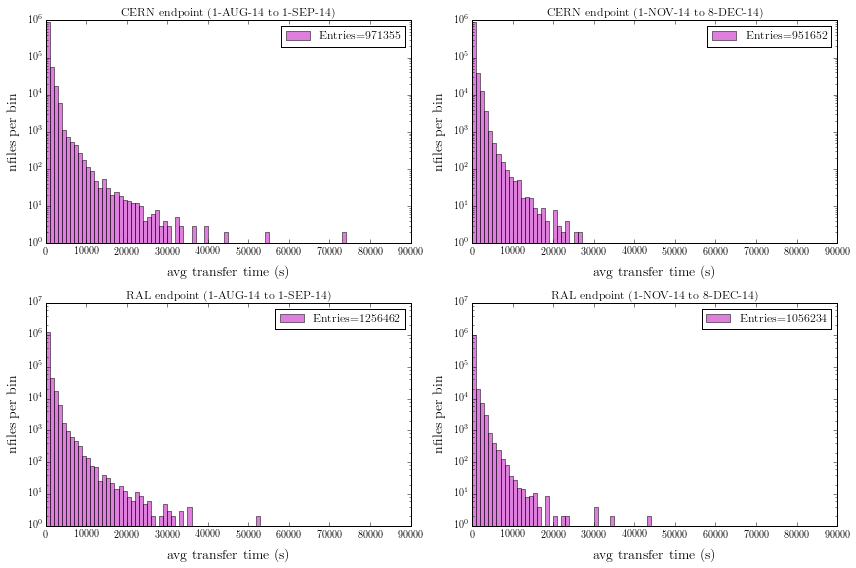

In [33]:
fig,ax4 = figandax4()
for i,key in enumerate(dfs2): 
    df,ax = dfs2[key],ax4[i]
    ax.set_xlabel('avg transfer time (s)', labelpad=8, fontsize=14)
    ax.set_ylabel('nfiles per bin', labelpad=8, fontsize=14)
    #(df.avgdttr).hist( ax=ax, log=True ) # OK (simplest)
    dfhist( df.avgdttr, ax, 0, 90000, 90, weights=df.nsuc, log=True )
plt.tight_layout() # This must be called at the end...

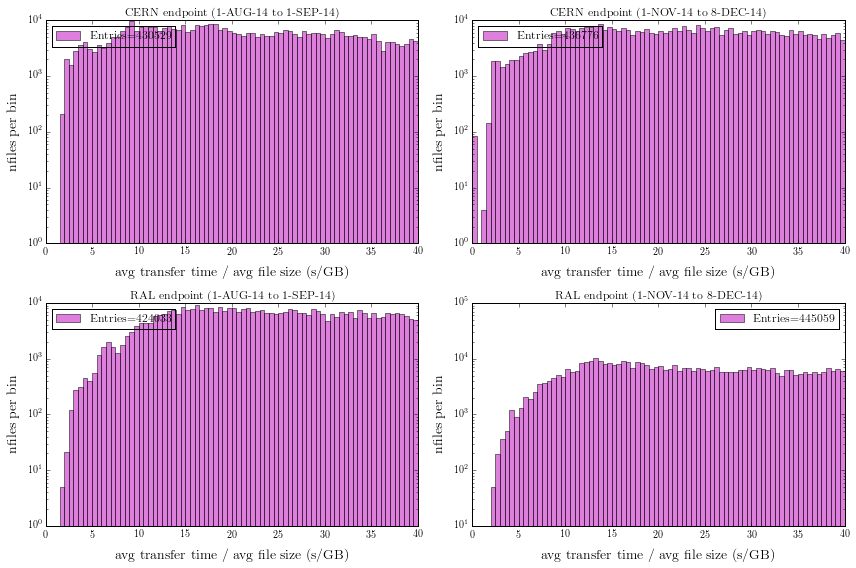

In [34]:
fig,ax4 = figandax4()
for i,key in enumerate(dfs2): 
    df,ax = dfs2[key],ax4[i]
    ax.set_xlabel('avg transfer time / avg file size (s/GB)', labelpad=8, fontsize=14)
    ax.set_ylabel('nfiles per bin', labelpad=8, fontsize=14)
    #(df.avgdttr/df.avgfsiz*1000**3).hist( ax=ax, log=True ) # OK (simplest)
    #dfhist( df.avgdttr/df.avgfsiz*1000**3, ax, 0, 40000, 80, weights=df.nsuc, log=True ) # full range NICE
    #dfhist( df.avgdttr/df.avgfsiz*1000**3, ax, 0, 4000, 80, weights=df.nsuc, log=True ) # zoom x 10! NICE
    #dfhist( df.avgdttr/df.avgfsiz*1000**3, ax, 0, 800, 80, weights=df.nsuc, log=True ) # zoom x 50! NICE
    #dfhist( df.avgdttr/df.avgfsiz*1000**3, ax, 0, 200, 80, weights=df.nsuc, log=True ) # zoom x 200! NICE
    dfhist( df.avgdttr/df.avgfsiz*1000**3, ax, 0, 40, 80, weights=df.nsuc, log=True ) # zoom x 1000! NICE
plt.tight_layout() # This must be called at the end...

In [35]:
cndf2.query('avgdttr<5.')

srcs dsts                                 srch  \
563433   n/a  n/a             dcdoor09.usatlas.bnl.gov   
565182   n/a  n/a          f-dpm000.grid.sinica.edu.tw   
568091   n/a  n/a          f-dpm000.grid.sinica.edu.tw   
568646   n/a  n/a          f-dpm000.grid.sinica.edu.tw   
569247   n/a  n/a          f-dpm000.grid.sinica.edu.tw   
569329   n/a  n/a                 ccdcatli013.in2p3.fr   
569852   n/a  n/a                 ccdcatli013.in2p3.fr   
571348   n/a  n/a                 ccdcatli013.in2p3.fr   
571684   n/a  n/a                 ccdcatli013.in2p3.fr   
571789   n/a  n/a                 ccdcatli013.in2p3.fr   
571916   n/a  n/a              f01-060-114-e.gridka.de   
572096   n/a  n/a          f-dpm000.grid.sinica.edu.tw   
572515   n/a  n/a                 ccdcatli013.in2p3.fr   
572808   n/a  n/a          f-dpm000.grid.sinica.edu.tw   
572912   n/a  n/a          f-dpm000.grid.sinica.edu.tw   
572913   n/a  n/a          f-dpm000.grid.sinica.edu.tw   
573092   n/a  n/a                 ccdcatli013.in2p3.fr   
573459   n/a  n/a                 ccdcatli013.in2p3.fr   
573512   n/a  n/a                 ccdcatli013.in2p3.fr   
573719   n/a  n/a          f-dpm000.grid.sinica.edu.tw   
576239   n/a  n/a          f-dpm000.grid.sinica.edu.tw   
576688   n/a  n/a          f-dpm000.grid.sinica.edu.tw   
576689   n/a  n/a          f-dpm000.grid.sinica.edu.tw   
577801   n/a  n/a          f-dpm000.grid.sinica.edu.tw   
578042   n/a  n/a          f-dpm000.grid.sinica.edu.tw   
578062   n/a  n/a          f-dpm000.grid.sinica.edu.tw   
578333   n/a  n/a          f-dpm000.grid.sinica.edu.tw   
579016   n/a  n/a          f-dpm000.grid.sinica.edu.tw   
983388   n/a  n/a  bohr3226.tier2.hep.manchester.ac.uk   
1195938  n/a  n/a        storm-fe-lhcb.cr.cnaf.infn.it   
1289731  n/a  n/a                  grid05.lal.in2p3.fr   
1293595  n/a  n/a        storm-fe-lhcb.cr.cnaf.infn.it   
1315893  n/a  n/a                      lpnse1.in2p3.fr   

                                  dsth       srct           dstt  \
563433           tier2-02.ochep.ou.edu        n/a  ATLASDATADISK   
565182           tier2-02.ochep.ou.edu        n/a  ATLASDATADISK   
568091              se-goegrid.gwdg.de        n/a  ATLASDATADISK   
568646              se-goegrid.gwdg.de        n/a  ATLASDATADISK   
569247              se-goegrid.gwdg.de        n/a  ATLASDATADISK   
569329            charon01.westgrid.ca        n/a  ATLASDATADISK   
569852            charon01.westgrid.ca        n/a  ATLASDATADISK   
571348            charon01.westgrid.ca        n/a  ATLASDATADISK   
571684            charon01.westgrid.ca        n/a  ATLASDATADISK   
571789            charon01.westgrid.ca        n/a  ATLASDATADISK   
571916                srmv2.ific.uv.es        n/a  ATLASDATADISK   
572096              se-goegrid.gwdg.de        n/a  ATLASDATADISK   
572515            charon01.westgrid.ca        n/a  ATLASDATADISK   
572808              se-goegrid.gwdg.de        n/a  ATLASDATADISK   
572912              se-goegrid.gwdg.de        n/a  ATLASDATADISK   
572913            wormhole.westgrid.ca        n/a  ATLASDATADISK   
573092            charon01.westgrid.ca        n/a  ATLASDATADISK   
573459            charon01.westgrid.ca        n/a  ATLASDATADISK   
573512            charon01.westgrid.ca        n/a  ATLASDATADISK   
573719              se-goegrid.gwdg.de        n/a  ATLASDATADISK   
576239              se-goegrid.gwdg.de        n/a  ATLASDATADISK   
576688              se-goegrid.gwdg.de        n/a  ATLASDATADISK   
576689            wormhole.westgrid.ca        n/a  ATLASDATADISK   
577801            wormhole.westgrid.ca        n/a  ATLASDATADISK   
578042            wormhole.westgrid.ca        n/a  ATLASDATADISK   
578062            wormhole.westgrid.ca        n/a  ATLASDATADISK   
578333            wormhole.westgrid.ca        n/a  ATLASDATADISK   
579016              se-goegrid.gwdg.de        n/a  ATLASDATADISK   
983388        srm-lhcb.gridpp.rl.ac.uk  LHCb-Disk      LHCb-Dis

In [36]:
# Let's get rid of those errors!
import collections
dfs3 = collections.OrderedDict()  # only with avg sizes > 2 GB (ie 2E9 bytes) AND dttr>0
for key in dfs: dfs3[key] = dfs2[key].query('dttr>0')

In [37]:
cadf3 = dfs3['aug2014', 'CERN']
cndf3 = dfs3['nov2014', 'CERN']
radf3 = dfs3['aug2014', 'RAL ']
rndf3 = dfs3['nov2014', 'RAL ']

## Using pandas groups

### Group by channel

In [38]:
# See http://pandas.pydata.org/pandas-docs/stable/groupby.html
gb = cadf3.groupby(['chan'])
###for g in gb: print g # NEVER EVER DO THIS! IT DUMPS 1M objects!
print type(gb)
print dir(gb)

<class 'pandas.core.groupby.DataFrameGroupBy'>
['__bytes__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__format__', '__getattr__', '__getattribute__', '__getitem__', '__hash__', '__init__', '__iter__', '__len__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '__weakref__', '_aggregate_generic', '_aggregate_item_by_item', '_aggregate_multiple_funcs', '_apply_filter', '_apply_to_column_groupbys', '_apply_whitelist', '_block_agg_axis', '_choose_path', '_concat_objects', '_constructor', '_count', '_cumcount_array', '_cython_agg_blocks', '_cython_agg_general', '_decide_output_index', '_def_str', '_define_paths', '_dir_additions', '_dir_deletions', '_get_data_to_aggregate', '_get_index', '_group_selection', '_index_with_as_index', '_insert_inaxis_grouper_inplace', '_internal_names', '_internal_names_set', '_iterate_column_groupbys', '_iterate_slices', '_make_wrapper', '_obj_w

In [39]:
gr = gb.groups
print type(gr) # This is a dict
print len(gr), 'channels:'
for g in gr: print g,

<type 'dict'>
1755 channels:
srm://lhcbsrm-kit.gridka.de__srm://lhcbsrm-kit.gridka.de srm://ccsrm.in2p3.fr__srm://grid-cert-03.roma1.infn.it srm://t2cmcondor.mi.infn.it__srm://tau-se.hep.tau.ac.il srm://atlassrm-fzk.gridka.de__srm://srmatlas.pic.es srm://dc2-grid-64.brunel.ac.uk__srm://srm2.grid.sinica.edu.tw srm://bohr3226.tier2.hep.manchester.ac.uk__srm://srm.grid.sara.nl srm://cmsrm-se01.roma1.infn.it__srm://storage01.lcg.cscs.ch srm://ccsrm.in2p3.fr__srm://ccsrm.in2p3.fr gsiftp://eoscmsftp.cern.ch__srm://cluster142.knu.ac.kr srm://f-dpm001.grid.sinica.edu.tw__srm://srmatlas.pic.es srm://osgserv04.slac.stanford.edu__srm://srmatlas.pic.es srm://se-goegrid.gwdg.de__srm://storm02.clumeq.mcgill.ca srm://gfe02.grid.hep.ph.ic.ac.uk__srm://eymir.grid.metu.edu.tr srm://atlassrm-fzk.gridka.de__srm://grid-cert-03.roma1.infn.it srm://dcsrm.usatlas.bnl.gov__srm://charon01.westgrid.ca srm://cmssrmdisk.fnal.gov__srm://cit-se.ultralight.org srm://srm.triumf.ca__srm://charon01.westgrid.ca srm://sto

In [40]:
gc=gb.count()
type(gc) # This is a DataFame
gc = gc.sort('nsuc',ascending=False) # Could sort on any column, the counts are all the same!
display(gc,9)

[('srcs', dtype('int64')), ('dsts', dtype('int64')), ('srch', dtype('int64')), ('dsth', dtype('int64')), ('srct', dtype('int64')), ('dstt', dtype('int64')), ('vo', dtype('int64')), ('endp', dtype('int64')), ('acty', dtype('int64')), ('tend', dtype('int64')), ('nsuc', dtype('int64')), ('nfai', dtype('int64')), ('fsiz', dtype('int64')), ('nstr', dtype('int64')), ('dttr', dtype('int64')), ('dtsp', dtype('int64')), ('dtsf', dtype('int64')), ('tupd', dtype('int64')), ('avgfsiz', dtype('int64')), ('avgdttr', dtype('int64')), ('totnstr', dtype('int64'))]


In [41]:
# Show how many monitoring records exist per channel
# Could use any column, the counts are of course all the same (except for None's maybe)
print gc["nsuc"] 

chan
srm://cmssrm.fnal.gov__srm://se01.indiacms.res.in                           3132
srm://lcgsedc01.jinr.ru__srm://storm-fe-cms.cr.cnaf.infn.it                 2236
srm://srm-eoslhcb.cern.ch__srm://srm-lhcb.gridpp.rl.ac.uk                   2192
srm://lcgsedc01.jinr.ru__srm://srm-cms.jinr-t1.ru                           2136
srm://srm-cms.jinr-t1.ru__srm://se.grid.icm.edu.pl                          2009
srm://srm-eoslhcb.cern.ch__srm://srm-lhcb.cern.ch                           1935
srm://storm-fe-lhcb.cr.cnaf.infn.it__srm://srm-lhcb.gridpp.rl.ac.uk         1744
srm://storm-fe-cms.cr.cnaf.infn.it__srm://se01.indiacms.res.in              1692
srm://srm-eoslhcb.cern.ch__srm://storm-fe-lhcb.cr.cnaf.infn.it              1681
srm://storm-fe-cms.cr.cnaf.infn.it__srm://se.grid.icm.edu.pl                1623
srm://srm-cms.cern.ch__srm://storm-fe-cms.cr.cnaf.infn.it                   1571
srm://storm-fe-lhcb.cr.cnaf.infn.it__srm://srm-eoslhcb.cern.ch              1561
srm://cmssrm-kit.gridka

In [42]:
# Compute sums
gs=gb.sum()

In [43]:
# And add a useful column (throughput in MB/s)
gs['thrmbs']=gs['fsiz']/gs['dttr']/10**6

In [44]:
# Select only a subset of columns for more readable displays
gs = gs[ ["nsuc", "fsiz", "thrmbs", "nstr"] ]

In [45]:
# Sort by total data volume transferred
gs = gs.sort('fsiz',ascending=False)
display(gs, 35)
###print gs["fsiz"]

[('nsuc', dtype('int64')), ('fsiz', dtype('int64')), ('thrmbs', dtype('float64')), ('nstr', dtype('float64'))]


In [46]:
# Sort by total #files transferred
gs = gs.sort('nsuc',ascending=False)
display(gs,35)
###print gs["nsuc"]

[('nsuc', dtype('int64')), ('fsiz', dtype('int64')), ('thrmbs', dtype('float64')), ('nstr', dtype('float64'))]


In [47]:
# Sort by average throughput
gs = gs.sort('thrmbs',ascending=False)
display(gs,35)
###print gs["thrmbs"]

[('nsuc', dtype('int64')), ('fsiz', dtype('int64')), ('thrmbs', dtype('float64')), ('nstr', dtype('float64'))]


### Define channel categories

In [48]:
import itertools
for g in itertools.islice(gr,10): 
    print g, g.split("__")

srm://lhcbsrm-kit.gridka.de__srm://lhcbsrm-kit.gridka.de ['srm://lhcbsrm-kit.gridka.de', 'srm://lhcbsrm-kit.gridka.de']
srm://ccsrm.in2p3.fr__srm://grid-cert-03.roma1.infn.it ['srm://ccsrm.in2p3.fr', 'srm://grid-cert-03.roma1.infn.it']
srm://t2cmcondor.mi.infn.it__srm://tau-se.hep.tau.ac.il ['srm://t2cmcondor.mi.infn.it', 'srm://tau-se.hep.tau.ac.il']
srm://atlassrm-fzk.gridka.de__srm://srmatlas.pic.es ['srm://atlassrm-fzk.gridka.de', 'srm://srmatlas.pic.es']
srm://dc2-grid-64.brunel.ac.uk__srm://srm2.grid.sinica.edu.tw ['srm://dc2-grid-64.brunel.ac.uk', 'srm://srm2.grid.sinica.edu.tw']
srm://bohr3226.tier2.hep.manchester.ac.uk__srm://srm.grid.sara.nl ['srm://bohr3226.tier2.hep.manchester.ac.uk', 'srm://srm.grid.sara.nl']
srm://cmsrm-se01.roma1.infn.it__srm://storage01.lcg.cscs.ch ['srm://cmsrm-se01.roma1.infn.it', 'srm://storage01.lcg.cscs.ch']
srm://ccsrm.in2p3.fr__srm://ccsrm.in2p3.fr ['srm://ccsrm.in2p3.fr', 'srm://ccsrm.in2p3.fr']
gsiftp://eoscmsftp.cern.ch__srm://cluster142.knu.a

In [49]:
for g in itertools.islice(gr,10): 
    src,dst = g.split("__")
    ###src = ".".join(src.split("//")[1].split('.')[-3:])
    ###dst = ".".join(dst.split("//")[1].split('.')[-3:])
    srcdom = ".".join(src.split('.')[-2:])
    dstdom = ".".join(dst.split('.')[-2:])
    print g, srcdom, dstdom

srm://lhcbsrm-kit.gridka.de__srm://lhcbsrm-kit.gridka.de gridka.de gridka.de
srm://ccsrm.in2p3.fr__srm://grid-cert-03.roma1.infn.it in2p3.fr infn.it
srm://t2cmcondor.mi.infn.it__srm://tau-se.hep.tau.ac.il infn.it ac.il
srm://atlassrm-fzk.gridka.de__srm://srmatlas.pic.es gridka.de pic.es
srm://dc2-grid-64.brunel.ac.uk__srm://srm2.grid.sinica.edu.tw ac.uk edu.tw
srm://bohr3226.tier2.hep.manchester.ac.uk__srm://srm.grid.sara.nl ac.uk sara.nl
srm://cmsrm-se01.roma1.infn.it__srm://storage01.lcg.cscs.ch infn.it cscs.ch
srm://ccsrm.in2p3.fr__srm://ccsrm.in2p3.fr in2p3.fr in2p3.fr
gsiftp://eoscmsftp.cern.ch__srm://cluster142.knu.ac.kr cern.ch ac.kr
srm://f-dpm001.grid.sinica.edu.tw__srm://srmatlas.pic.es edu.tw pic.es


In [50]:
srcs, dsts = [], []
for g in gr: 
    src, dst = g.split("__")
    src = ".".join(src.split("//")[1].split('.')[-3:])
    dst = ".".join(dst.split("//")[1].split('.')[-3:])
    srcs.append(src)
    dsts.append(dst)
srcs = sorted(set(srcs))
dsts = sorted(set(dsts))
print len(gr), "channels;", len(srcs), "sources;", len(dsts), "destinations"
###print srcs
###print dsts
allsites = sorted(set(srcs+dsts))
print len(allsites), "sites:"
for s in allsites: print s

1755 channels; 126 sources; 60 destinations
131 sites:
accre.vanderbilt.edu
atlas.bu.edu
atlassrm-fzk.gridka.de
ba.infn.it
bfg.uni-freiburg.de
bham.ac.uk
bris.ac.uk
brunel.ac.uk
cam.ac.uk
ccsrm.in2p3.fr
ccsrmt2.in2p3.fr
charon01.westgrid.ca
chula.ac.th
cis.gov.pl
cit-se.ultralight.org
clrlcgse01.in2p3.fr
clumeq.mcgill.ca
cms-se.sdfarm.kr
cmsaf.mit.edu
cmssrm-kit.gridka.de
cmssrm.fnal.gov
cmssrmdisk.fnal.gov
cnaf.infn.it
cyf-kr.edu.pl
datagrid.cea.fr
dcache-se-atlas.desy.de
dcache-se-cms.desy.de
dcache07.unl.edu
dgridsrm-fzk.gridka.de
ed.ac.uk
eosatlassftp.cern.ch
eoscmsftp.cern.ch
farm.particle.cz
fmph.uniba.sk
ft.uam.es
gk03.atlas-swt2.org
grid.kiae.ru
grid.lrz.de
grid.sara.nl
grid05.unige.ch
grid143.kfki.hu
head01.aglt2.org
hep.kbfi.ee
hep.wisc.edu
hepgrid.uerj.br
hepse01.colorado.edu
hpc.utfsm.cl
ic.ac.uk
icm.edu.pl
ific.uv.es
ihep.ac.cn
ihepa.ufl.edu
iihe.ac.be
indiacms.res.in
inr.troitsk.ru
kipt.kharkov.ua
knu.ac.kr
lal.in2p3.fr
lancs.ac.uk
lapp-se01.in2p3.fr
lcg-se0.ifh.de
lcg-se

In [51]:
t1s = ['bnl.gov', 'ccsrm.in2p3.fr', 'cern.ch', 'cnaf.infn.it', 'fnal.gov', 'gridka.de', 'ndgf.org', 'nikhef.nl', 
       'pic.es', 'rl.ac.uk', 'sara.nl', 'sinica.edu.tw', 'triumf.ca']
print sorted(t1s)
print any(["srm://lhcbsrm-kit.gridka.de".find(t1)>=0 for t1 in t1s])
print any(["srm://bohr3226.tier2.hep.manchester.ac.uk".find(t1)>=0 for t1 in t1s])

['bnl.gov', 'ccsrm.in2p3.fr', 'cern.ch', 'cnaf.infn.it', 'fnal.gov', 'gridka.de', 'ndgf.org', 'nikhef.nl', 'pic.es', 'rl.ac.uk', 'sara.nl', 'sinica.edu.tw', 'triumf.ca']
True
False


In [52]:
# Split up channels in various categories
def channel_category2(ch,**kwds): 
    src,dst = ch.split('__')
    srcdom = ".".join(src.split('.')[-2:])
    dstdom = ".".join(dst.split('.')[-2:])
    srct1 = any([src.find(t1)>=0 for t1 in t1s])
    dstt1 = any([dst.find(t1)>=0 for t1 in t1s])
    if src == dst: return 0, "LOCALSITE  "
    elif srcdom == dstdom: return 1, "LOCALDOMAIN" 
    elif srct1 and dstt1: return 2, "TIER1TIER1 "
    elif srct1 or dstt1: return 3, "TIER1OTHER "
    else: return 4, "OTHEROTHER "
def channel_category(ch,**kwds): 
    return channel_category2(ch)[0] # Only the id

import itertools
for g in itertools.islice(gr,50): 
    print channel_category2(g), g

(0, 'LOCALSITE  ') srm://lhcbsrm-kit.gridka.de__srm://lhcbsrm-kit.gridka.de
(3, 'TIER1OTHER ') srm://ccsrm.in2p3.fr__srm://grid-cert-03.roma1.infn.it
(4, 'OTHEROTHER ') srm://t2cmcondor.mi.infn.it__srm://tau-se.hep.tau.ac.il
(2, 'TIER1TIER1 ') srm://atlassrm-fzk.gridka.de__srm://srmatlas.pic.es
(3, 'TIER1OTHER ') srm://dc2-grid-64.brunel.ac.uk__srm://srm2.grid.sinica.edu.tw
(3, 'TIER1OTHER ') srm://bohr3226.tier2.hep.manchester.ac.uk__srm://srm.grid.sara.nl
(4, 'OTHEROTHER ') srm://cmsrm-se01.roma1.infn.it__srm://storage01.lcg.cscs.ch
(0, 'LOCALSITE  ') srm://ccsrm.in2p3.fr__srm://ccsrm.in2p3.fr
(3, 'TIER1OTHER ') gsiftp://eoscmsftp.cern.ch__srm://cluster142.knu.ac.kr
(2, 'TIER1TIER1 ') srm://f-dpm001.grid.sinica.edu.tw__srm://srmatlas.pic.es
(3, 'TIER1OTHER ') srm://osgserv04.slac.stanford.edu__srm://srmatlas.pic.es
(4, 'OTHEROTHER ') srm://se-goegrid.gwdg.de__srm://storm02.clumeq.mcgill.ca
(4, 'OTHEROTHER ') srm://gfe02.grid.hep.ph.ic.ac.uk__srm://eymir.grid.metu.edu.tr
(3, 'TIER1OTH

In [53]:
# Add some useful columns
for key in dfs3: 
    df=dfs3[key]
    df['chnctg'] = df['chan'].apply(channel_category,axis=1) # WARNING, BUT IT WORKS

/afs/cern.ch/sw/lcg/releases/pytools/1.9_python2.7-79b47/x86_64-slc6-gcc48-opt/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [54]:
display(cadf3,15)

[('srcs', dtype('O')), ('dsts', dtype('O')), ('srch', dtype('O')), ('dsth', dtype('O')), ('srct', dtype('O')), ('dstt', dtype('O')), ('chan', dtype('O')), ('vo', dtype('O')), ('endp', dtype('O')), ('acty', dtype('O')), ('tend', dtype('<M8[ns]')), ('nsuc', dtype('int64')), ('nfai', dtype('int64')), ('fsiz', dtype('int64')), ('nstr', dtype('float64')), ('dttr', dtype('int64')), ('dtsp', dtype('int64')), ('dtsf', dtype('int64')), ('tupd', dtype('<M8[ns]')), ('avgfsiz', dtype('float64')), ('avgdttr', dtype('float64')), ('totnstr', dtype('float64')), ('chnctg', dtype('int64'))]


### Group by channel categories

In [55]:
# Compute and display data directly for all four data sets
import collections
dfs3gs = collections.OrderedDict()  # only with avg sizes > 2 GB (ie 2E9 bytes) AND dttr>0
for key in dfs3: 
    # Group by category and compute sums
    dfs3gs[key] = dfs3[key].groupby(['chnctg']).sum()
    ggs = dfs3gs[key] # WARNING!.... copies below!....
    # Add a useful column (throughput in MB/s)
    ggs['thrmbs']=ggs['fsiz']/ggs['dttr']/10**6
    # Add a useful column (average streams per file)
    # FIXME1! nstr in the original table is already an average, rather than a sum: must weight by nsuc in each record...
    # FIXME2! did I set nstr=0 when this was absent? should we set it to nsuc, or exclude these records?
    ###ggs['avgnstr']=ggs['nstr']/ggs['nsuc']
    # Update a useful column (average time per transfer)
    ggs['avgdttr']=ggs['dttr']/ggs['nsuc']
    # Select only a subset of columns for more readable displays
    ###ggs = ggs[ ["nsuc", "fsiz", "thrmbs", "nstr", "avgnstr", "avgdttr"] ]
    ggs = ggs[ ["nsuc", "fsiz", "thrmbs", "avgdttr"] ]
    # Before displaying, rename columns to make things clearer
    ###ggs.columns = [ c+"_"+key[0]+"_"+key[1] for c in ggs.columns ]
    ggs.columns = [ c+"_"+key[0] for c in ggs.columns ]
    # Display sorted by channel type
    print key, "Sum/Avg grouped by channel category"
    display(ggs,dumptypes=False)
    dfs3gs[key] = ggs # Some copies were involved and these are now different: fix this

('aug2014', 'CERN') Sum/Avg grouped by channel category


('aug2014', 'RAL ') Sum/Avg grouped by channel category


('nov2014', 'CERN') Sum/Avg grouped by channel category


('nov2014', 'RAL ') Sum/Avg grouped by channel category


In [56]:
cadf3gs = dfs3gs['aug2014', 'CERN']
cndf3gs = dfs3gs['nov2014', 'CERN']
radf3gs = dfs3gs['aug2014', 'RAL ']
rndf3gs = dfs3gs['nov2014', 'RAL ']

In [57]:
print "CERN endpoint:"
display( pd.concat([cadf3gs,cndf3gs],axis=1)[ [ "thrmbs_aug2014", "thrmbs_nov2014", 
                                               "avgdttr_aug2014", "avgdttr_nov2014" ] ], dumptypes=False )
print "RAL endpoint:"
display( pd.concat([radf3gs,rndf3gs],axis=1)[ [ "thrmbs_aug2014", "thrmbs_nov2014", 
                                               "avgdttr_aug2014", "avgdttr_nov2014" ] ], dumptypes=False )

CERN endpoint:


RAL endpoint:


In [58]:
# TODO:
# plot throuhput histos as sums of various components: show that there are many curves superposed!
# here we can separate them (without fits) because we know some relevant variables, chcategory...
# may also show these as boxplots by groups

# mention that here the relevant category of "errors" may be boxplots...
# ie we just get an estimation of the widths of the distributions (descriptive, not inferential)

# mention that streams need to be better propagated in my data frames

# mention that there are clearly other parameters,
# as we see that there are large fluctuations on throughput in th same channel category

# mentioon that not channels in the same category are equivalent

# mention that a change/distortion of the relvant ingredients (eg channels requested by users) in the cake
# will lead to different apparent results: so yes there seems to be an improvement
# in throughput in most cases (not all), but its relation to the new algo is far from clear

# why cern and ral endpnt so different for local transfers?

# conclude on correlation does not imply causation